# Load and Plot
## Load Libraries

In [47]:
# Base libraries
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from tqdm import tqdm
from tqdm import tnrange
from scipy.special import erf
import pickle
import itertools

# Personal libraries
import sixtrackwrap as sx

from parameters import *

cmap = matplotlib.cm.get_cmap('plasma')

# Matplotlib Settings
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

import matplotlib.ticker as ticker
matplotlib.rcParams['figure.dpi']= 100
matplotlib.rcParams['savefig.dpi'] = 300

## Load Data
### Load Baseline

In [48]:
with open("data/DA_b.pkl", 'rb') as f:
    DA_b = pickle.load(f)
    
with open("data/error_b.pkl", 'rb') as f:
    error_b = pickle.load(f)

with open("data/DA_b_mc.pkl", 'rb') as f:
    DA_b_mc = pickle.load(f)
    
with open("data/error_b_mc.pkl", 'rb') as f:
    error_b_mc = pickle.load(f)

### Load Standard Integral

In [49]:
with open("data/DA_1.pkl", 'rb') as f:
    DA_1 = pickle.load(f)
    
with open("data/error_1.pkl", 'rb') as f:
    error_1 = pickle.load(f)

### Load Radial Average

In [50]:
with open("data/DA_2.pkl", 'rb') as f:
    DA_2 = pickle.load(f)
    
with open("data/error_2.pkl", 'rb') as f:
    error_2 = pickle.load(f)
    
with open("data/count_matrix_2.pkl", 'rb') as f:
    count_matrix_2 = pickle.load(f)
    
with open("data/avg_matrix_2.pkl", 'rb') as f:
    average_matrix_2 = pickle.load(f)

### Load Monte Carlo

In [51]:
with open("data/DA_3.pkl", 'rb') as f:
    DA_3 = pickle.load(f)
    
with open("data/error_3.pkl", 'rb') as f:
    error_3 = pickle.load(f)

### Load Stratified Monte Carlo

In [52]:
with open("data/DA_4.pkl", 'rb') as f:
    DA_4 = pickle.load(f)

with open("data/error_4.pkl", 'rb') as f:
    error_4 = pickle.load(f)

### Load 2D Scanning

In [53]:
with open("data/DA_5.pkl", 'rb') as f:
    DA_5 = pickle.load(f)
    
with open("data/error_5.pkl", 'rb') as f:
    error_5 = pickle.load(f)

## Plot Stuff

### Angles heatmap (Angular Average)

In [8]:
import matplotlib.pyplot as plt
import matplotlib
cmap = matplotlib.cm.get_cmap('plasma')

import matplotlib.ticker as ticker

for key in tqdm(list(sorted(count_matrix_2, key=lambda a : a[1]))):
    for i in tqdm(range(len(average_matrix_2[key]))):
        fig, axs = plt.subplots(1,2, figsize=(12,6))

        coso = axs[0].imshow(np.nanmean(average_matrix_2[key][i], axis=0), origin="lower", extent=(0, np.pi*2, 0, np.pi*2))
        axs[0].set_title("Average radius measured\n$\\alpha$ samples $= {}$, $N$ iters $={}$".format(key[0], key[1]))
        axs[0].set_xlabel("$\\theta_1$")
        axs[0].set_ylabel("$\\theta_2$")
        fig.colorbar(coso, ax=axs[0])

        axs[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(int(x/np.pi)) + "$\\pi$"))
        axs[0].xaxis.set_major_locator(ticker.MultipleLocator(base=np.pi))
        axs[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(int(x/np.pi)) + "$\\pi$"))
        axs[0].yaxis.set_major_locator(ticker.MultipleLocator(base=np.pi))

        coso = axs[1].imshow(np.nanmean(count_matrix_2[key][i], axis=0), origin="lower", extent=(0, np.pi*2, 0, np.pi*2), vmin=0)
        axs[1].set_title("Number of samples\n$\\alpha$ samples $= {}$, $N$ iters $={}$".format(key[0], key[1]))
        axs[1].set_xlabel("$\\theta_1$")
        axs[1].set_ylabel("$\\theta_2$")
        fig.colorbar(coso, ax=axs[1])

        axs[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(int(x/np.pi)) + "$\\pi$"))
        axs[1].xaxis.set_major_locator(ticker.MultipleLocator(base=np.pi))
        axs[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(int(x/np.pi)) + "$\\pi$"))
        axs[1].yaxis.set_major_locator(ticker.MultipleLocator(base=np.pi))

        plt.tight_layout()
        # print(key)
        plt.savefig("img/cm_N_" + str(int(key[0])) + "_t_" + str(key[1]) + "_el_" + str(i) + ".jpg", dpi=300)
        plt.close()

  0%|          | 0/5 [00:00<?, ?it/s]<ipython-input-8-986db3e818e4>:11: RuntimeWarning: Mean of empty slice
  coso = axs[0].imshow(np.nanmean(average_matrix_2[key][i], axis=0), origin="lower", extent=(0, np.pi*2, 0, np.pi*2))

 20%|██        | 1/5 [00:00<00:03,  1.16it/s]<ipython-input-8-986db3e818e4>:11: RuntimeWarning: Mean of empty slice
  coso = axs[0].imshow(np.nanmean(average_matrix_2[key][i], axis=0), origin="lower", extent=(0, np.pi*2, 0, np.pi*2))

  0%|          | 0/5 [00:00<?, ?it/s]<ipython-input-8-986db3e818e4>:11: RuntimeWarning: Mean of empty slice
  coso = axs[0].imshow(np.nanmean(average_matrix_2[key][i], axis=0), origin="lower", extent=(0, np.pi*2, 0, np.pi*2))

 20%|██        | 1/5 [00:00<00:02,  1.72it/s]<ipython-input-8-986db3e818e4>:11: RuntimeWarning: Mean of empty slice
  coso = axs[0].imshow(np.nanmean(average_matrix_2[key][i], axis=0), origin="lower", extent=(0, np.pi*2, 0, np.pi*2))

  0%|          | 0/5 [00:00<?, ?it/s]<ipython-input-8-986db3e818e4>:11: Runt

In [10]:
import ffmpeg
import os

name = "movie.mp4"
if os.path.exists(name):
    os.remove(name)
    print("previous movie removed!")
(
    ffmpeg
    .input('img/cm_*.jpg', pattern_type='glob', framerate=2)
    .output(name)
    .run()
)

previous movie removed!


(None, None)

### Baseline

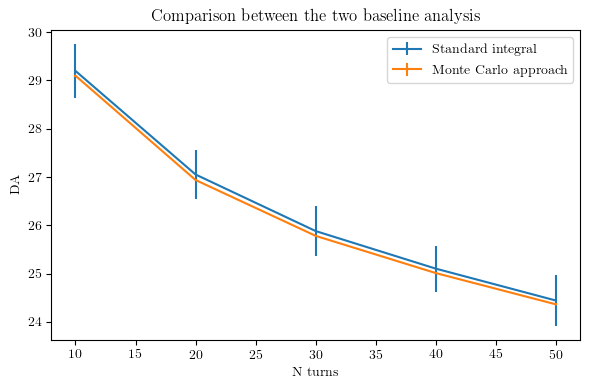

In [54]:
plt.figure()

plt.errorbar(turn_sampling, DA_b, yerr=error_b, label="Standard integral")
plt.errorbar(turn_sampling, DA_b_mc, yerr=error_b_mc, label="Monte Carlo approach")

plt.xlabel("N turns")
plt.ylabel("DA")

plt.legend()
plt.title("Comparison between the two baseline analysis")
plt.tight_layout()

plt.savefig("img/baseline.png", dpi=600)

### Standard Integral

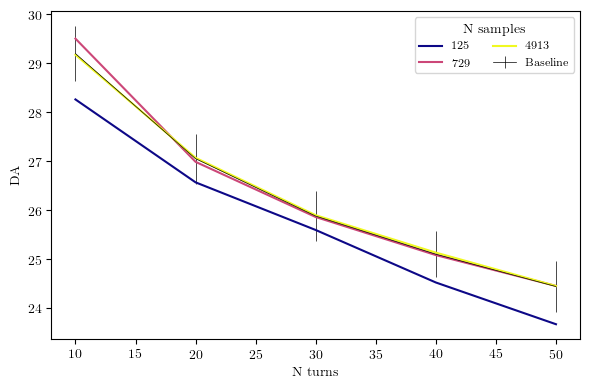

In [13]:
plt.figure()
plt.errorbar(turn_sampling, DA_b, yerr=error_b, c="black", linewidth=0.5, elinewidth=0.5, label="Baseline")
elements = np.linspace(0,1,len(DA_1))
for i, label in enumerate(sorted(DA_1)):
    plt.plot(turn_sampling, DA_1[label], c=cmap(elements[i]), label=str(label))
#plt.title("Comparison with Standard Integral")
plt.xlabel("N turns")
plt.ylabel("DA")

plt.legend(title="N samples", ncol=2, fontsize="small")
plt.tight_layout()

plt.savefig("img/standard_integral.png", dpi=600)
plt.savefig("img/standard_integral.pgf")

# plt.close()

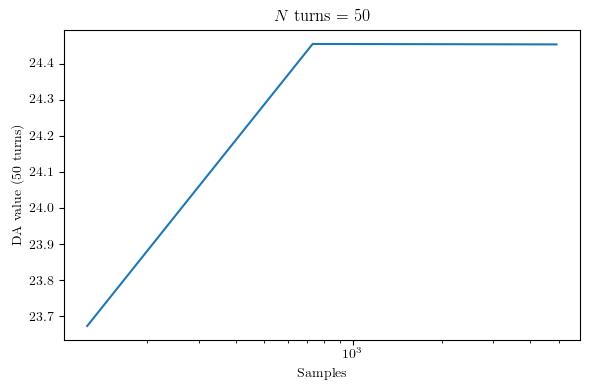

In [14]:
plt.figure()

data = []
error = []
labels = []

for i, label in enumerate(sorted(DA_1, key=lambda a: a)):
    data.append(DA_1[label][0])
    error.append(error_1[label][0])
    labels.append(label)
    
plt.plot(labels, data)

plt.title("$N$ turns $={}$".format(max_turns))
plt.xscale("log")
plt.xlabel("Samples")
plt.ylabel("DA value ({} turns)".format(max_turns))
plt.tight_layout()

plt.savefig("img/standard_integral_single.png", dpi=600)
plt.savefig("img/standard_integral_single.pgf")

#plt.close()

### Radial Average

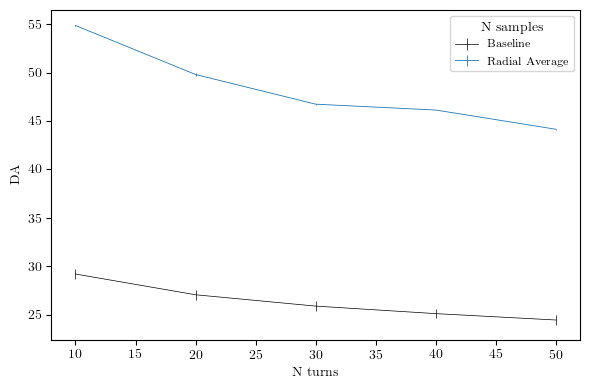

In [16]:
# Radial Average
plt.figure()
plt.errorbar(turn_sampling, DA_b, yerr=error_b, c="black", linewidth=0.5, elinewidth=0.5, label="Baseline")

label = sorted(DA_2)[-1]

plt.errorbar(turn_sampling, DA_2[label], yerr=error_2[label], label="Radial Average", linewidth=0.6, elinewidth=0.6)

#plt.title("Comparison with Angular Average")
plt.xlabel("N turns")
plt.ylabel("DA")
plt.legend(title="N samples", fontsize="small")
plt.tight_layout()

plt.savefig("img/radial_average.png", dpi=600)
plt.savefig("img/radial_average.pgf")

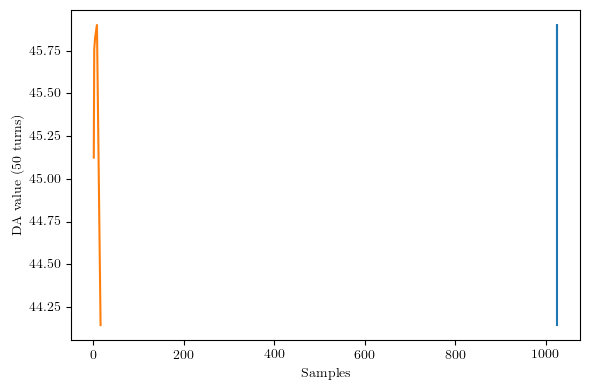

In [17]:
plt.figure()

data = []
error = []
labels = []

for i, label in enumerate(sorted(DA_2, key=lambda a: a)):
    data.append(DA_2[label][0])
    error.append(error_2[label][0])
    labels.append(label)
    
plt.plot(labels, data)

plt.xlabel("Samples")
plt.ylabel("DA value ({} turns)".format(max_turns))
plt.tight_layout()

plt.savefig("img/radial_average_single.png", dpi=600)
plt.savefig("img/radial_average_single.pgf")

### Monte Carlo

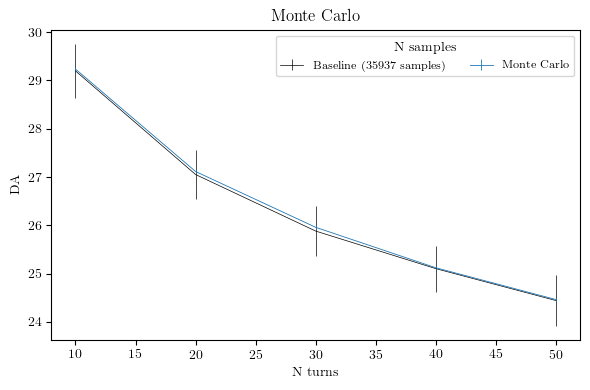

In [18]:
plt.figure()
plt.errorbar(turn_sampling, DA_b, yerr=error_b, c="black", linewidth=0.5, elinewidth=0.5, label="Baseline (35937 samples)")

label = sorted(DA_3)[-1]
plt.errorbar(turn_sampling, DA_3[label], yerr=error_3[label], label="Monte Carlo", linewidth=0.6, elinewidth=0.6)

plt.xlabel("N turns")
plt.ylabel("DA")

plt.legend(title="N samples", ncol=2, fontsize="small")
plt.title("Monte Carlo")
plt.tight_layout()

plt.savefig("img/monte_carlo.png", dpi=600)
plt.savefig("img/monte_carlo.pgf")

### Stratified Monte Carlo

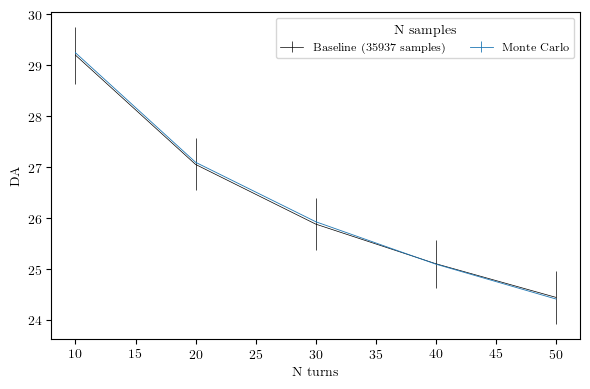

In [19]:
plt.figure()
plt.errorbar(turn_sampling, DA_b, yerr=error_b, c="black", linewidth=0.5, elinewidth=0.5, label="Baseline (35937 samples)")

label = sorted(DA_4)[-1]
plt.errorbar(turn_sampling, DA_4[label], yerr=error_4[label], label="Monte Carlo", linewidth=0.6, elinewidth=0.6)

plt.xlabel("N turns")
plt.ylabel("DA")

plt.legend(title="N samples", ncol=2, fontsize="small")
plt.tight_layout()

plt.savefig("img/stratified_monte_carlo.png", dpi=600)
plt.savefig("img/stratified_monte_carlo.pgf")

### Monte Carlo vs. Stratified

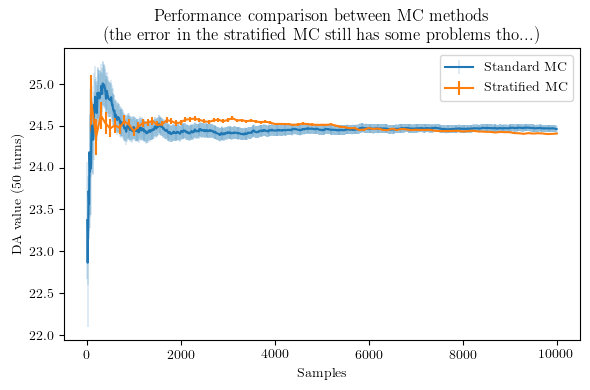

In [46]:
plt.figure()

data = []
error = []
labels = []

data_s = []
error_s = []
labels_s = []

for i, label in enumerate(sorted(DA_3, key=lambda a: a)):
    data.append(DA_3[label][0])
    error.append(error_3[label][0])
    labels.append(label)

for i, label in enumerate(sorted(DA_4, key=lambda a: a)):
    data_s.append(DA_4[label][0])
    error_s.append(error_4[label][0])
    labels_s.append(label)
    
plt.errorbar(labels, data, yerr=error, elinewidth=0.2, label="Standard MC")
plt.errorbar(labels_s, data_s, yerr=error_s, elinewidth=1.5, label="Stratified MC")

plt.legend()
plt.xlabel("Samples")
plt.ylabel("DA value ({} turns)".format(max_turns))
plt.title("Performance comparison between MC methods\n(the error in the stratified MC still has some problems tho...)")
plt.tight_layout()

plt.savefig("img/monte_carlo_single.png", dpi=600)
plt.savefig("img/monte_carlo_single.pgf")

### 2D Sampling

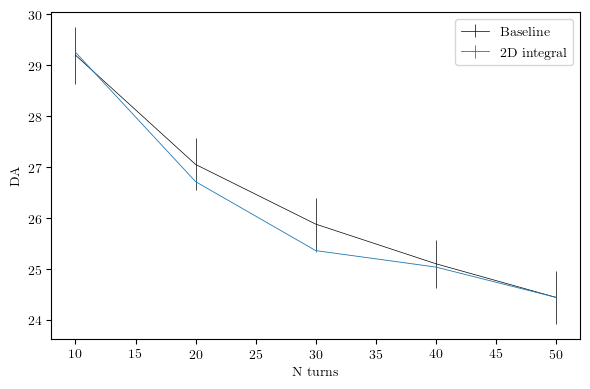

In [23]:
plt.figure()
plt.errorbar(turn_sampling, DA_b, yerr=error_b, c="black", linewidth=0.5, elinewidth=0.5, label="Baseline")
elements = np.linspace(0,1,len(DA_5))

label = sorted(DA_5)[-1]
plt.errorbar(turn_sampling, DA_5[label], yerr=error_5[label], label="2D integral", linewidth=0.6, elinewidth=0.6)

#plt.title("Comparison with 2D integral")
plt.xlabel("N turns")
plt.ylabel("DA")

plt.legend()
plt.tight_layout()

plt.savefig("img/2d_integral.png", dpi=600)
plt.savefig("img/2d_integral.pgf")

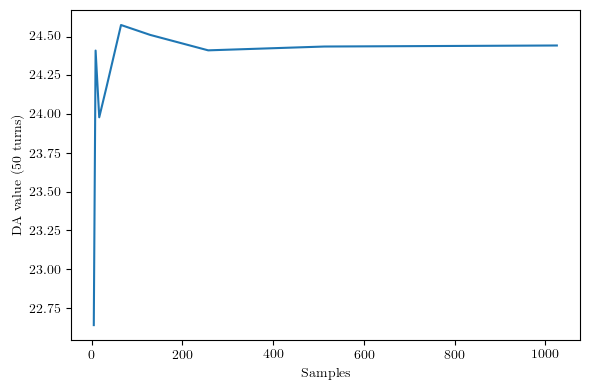

In [24]:
plt.figure()

data = []
error = []
labels = []

for i, label in enumerate(sorted(DA_5, key=lambda a: a[1])):
    data.append(DA_5[label][0])
    error.append(error_5[label][0])
    labels.append(label[0])
    
plt.plot(labels, data)

plt.xlabel("Samples")
plt.ylabel("DA value ({} turns)".format(max_turns))
plt.tight_layout()

plt.savefig("img/2d_single.png", dpi=600)
plt.savefig("img/2d_single.pgf")

### Maxi Contest

[5, 9, 17, 33, 65, 129, 257, 513, 1025] [40.66707505006734, 42.87478781600995, 43.54587695121235, 43.3953765267461, 44.62014133281435, 44.1945313529953, 44.056744002738355, 44.108302080534315, 44.144034143567666]


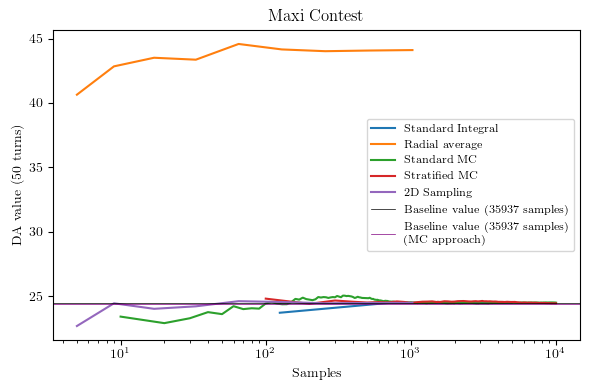

In [39]:
plt.figure()

data = []
error = []
labels = []

for i, label in enumerate(sorted(DA_1, key=lambda a: a)):
    data.append(DA_1[label][0])
    error.append(error_1[label][0])
    labels.append(label)

plt.plot(labels, data, label="Standard Integral")
    
data = []
error = []
labels = []

for label in sorted(filter(lambda x: x[1] == 16, DA_2.keys()), key=lambda a: a[0]):
    data.append(DA_2[label][0])
    error.append(error_2[label][0])
    labels.append(label[0])
print(labels, data)

plt.plot(labels, data, label="Radial average")
    
data = []
error = []
labels = []

data_s = []
error_s = []
labels_s = []

for i, label in enumerate(sorted(DA_3, key=lambda a: a)):
    data.append(DA_3[label][0])
    error.append(error_3[label][0])
    labels.append(label)

for i, label in enumerate(sorted(DA_4, key=lambda a: a)):
    data_s.append(DA_4[label][0])
    error_s.append(error_4[label][0])
    labels_s.append(label)
    
plt.plot(labels, data, label="Standard MC")
plt.plot(labels_s, data_s, label="Stratified MC")

data = []
error = []
labels = []

for i, label in enumerate(sorted(DA_5, key=lambda a: a)):
    data.append(DA_5[label][0])
    error.append(error_5[label][0])
    labels.append(label[0])
    
plt.plot(labels, data, label="2D Sampling")

plt.axhline(DA_b[0], color="black", linewidth=0.5, label="Baseline value (35937 samples)")
#plt.axhline(DA_b[0] + error_b[0], color="black", linewidth=0.5, label="Baseline value + error")
plt.axhline(DA_b_mc[0], color="purple", linewidth=0.5, label="Baseline value (35937 samples)\n(MC approach)")

plt.legend(fontsize="small")

plt.xlabel("Samples")
plt.ylabel("DA value ({} turns)".format(max_turns))
plt.title("Maxi Contest")
plt.tight_layout()

plt.xscale("log")

plt.savefig("img/mashup_single.png", dpi=300)
plt.savefig("img/mashup_single.pgf")